In [115]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Example: Visualizing Seaqttle Bicycle Counts

In [116]:
data = pd.read_csv('fremont-bridge-hourly-bicycle-counts-by-month-october-2012-to-present.csv', index_col='Date', parse_dates=True)
data

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2019-10-31 19:00:00,111.0,44.0,67.0
2019-10-31 20:00:00,52.0,17.0,35.0
2019-10-31 21:00:00,41.0,16.0,25.0


In [117]:
data.rename(columns={'Fremont Bridge Total': 'Total', 'Fremont Bridge East Sidewalk': 'East', 'Fremont Bridge West Sidewalk': 'West'}, inplace=True)

In [118]:
data.isna().any()

Total    True
East     True
West     True
dtype: bool

In [119]:
data.dropna().describe()

,Total,East,West
count,62030.000000,62030.000000,62030.000000
mean,114.654732,52.859455,61.795276
std,145.686289,67.739036,90.417584
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,62.000000,29.000000,30.000000
75%,150.000000,71.000000,74.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

In [120]:
%matplotlib inline
import seaborn
seaborn.set()

<AxesSubplot:xlabel='Date'>

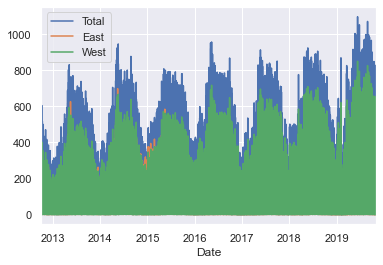

In [121]:
data.plot()

Text(0, 0.5, 'Weekly Bicycle Count')

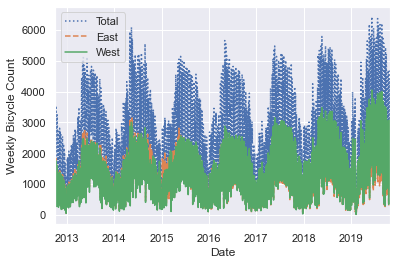

In [122]:
# Downgrading sample

daily = data.resample('D').sum()
daily.plot(style=[':', '--', '-'])
plt.ylabel('Weekly Bicycle Count')

### A Roll Mean

Using window function to smooth the version

<AxesSubplot:xlabel='Date'>

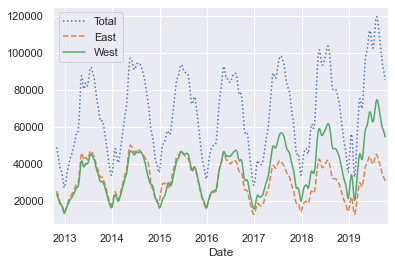

In [123]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

### Hourly Trend

In [124]:
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

<AxesSubplot:xlabel='time'>

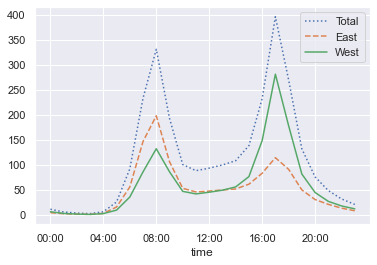

In [125]:
by_time = data.groupby(data.index.time).mean()

hourly_ticks = ['00:00', '4:00', '8:00', '12:00', '16:00', '20:00']
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

### Weekly Trend

<AxesSubplot:>

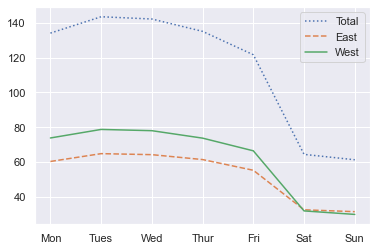

In [126]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

### Hourly Trend on Weekdays vs Weekend

In [127]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

Total        East        West
Weekday 00:00:00    9.893341    4.264754    5.628587
        01:00:00    4.898755    2.219816    2.678939
        02:00:00    3.270168    1.625338    1.644829
        03:00:00    2.807796    1.467244    1.340552
        04:00:00    7.755820    4.295073    3.460747
        05:00:00   33.957769   21.206822   12.750947
        06:00:00  122.571738   75.557661   47.014077
        07:00:00  314.083920  199.309691  114.774228
        08:00:00  439.125068  264.985923  174.139145
        09:00:00  237.332069  131.808234  105.523835
        10:00:00  101.288732   53.465330   47.823402
        11:00:00   76.095341   39.802817   36.292524
        12:00:00   78.340737   39.753521   38.587216
        13:00:00   84.492691   41.872767   42.619924
        14:00:00   95.753113   44.229020   51.524093
        15:00:00  138.646995   58.087168   80.559827
        16:00:00  273.824580   90.811586  183.012994
        17:00:00  511.284786  138.753113  372.531673
        18:00:00  344.508392  111.060097  233.448295
        19:00:00  162.658365   59.277206  103.381159
        20:00:00   90.178668   35.648078   54.530590
        21:00:00   56.740661   24.579859   32.160801
        22:00:00   36.213860   15.482945   20.730915
        23:00:00   22.734164    9.321603   13.412561
Weekend 00:00:00   16.662602    6.949864    9.712737
        01:00:00    9.669377    4.306233    5.363144
        02:00:00    6.270492    2.935792    3.334699
        03:00:00    3.621951    1.831978    1.789973
        04:00:00    4.024390    1.655827    2.368564
        05:00:00    7.540650    4.078591    3.462060
        06:00:00   17.372629    8.226287    9.146341
        07:00:00   33.042005   17.241192   15.800813
        08:00:00   61.109756   32.214092   28.895664
        09:00:00   82.901084   43.636856   39.264228
        10:00:00  100.420054   53.738482   46.681572
        11:00:00  120.640921   62.963415   57.677507
        12:00:00  132.888889   68.879404   64.009485
        13:00:00  139.479675   71.560976   67.918699
        14:00:00  141.378049   72.647696   68.730352
        15:00:00  139.357724   71.295393   68.062331
        16:00:00  129.325203   65.902439   63.422764
        17:00:00  108.368564   54.636856   53.731707
        18:00:00   84.203252   42.735772   41.467480
        19:00:00   56.926829   28.177507   28.749322
        20:00:00   41.902439   19.891599   22.010840
        21:00:00   29.880759   13.955285   15.925474
        22:00:00   22.689702   10.210027   12.479675
        23:00:00   17.995935    7.432249   10.563686

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

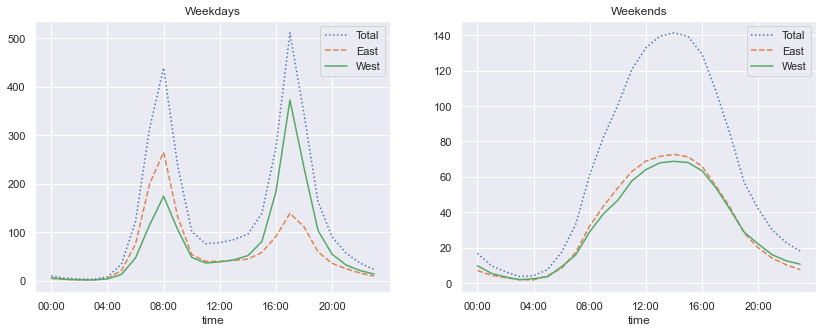

In [128]:
# Plot panel byside to side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
hourly_ticks = ['00:00', '4:00', '8:00', '12:00', '16:00', '20:00']
by_time.loc['Weekday'].plot(ax=ax[0],
                            title='Weekdays',
                            xticks=hourly_ticks, style=[':', '--', '-']
                            )

by_time.loc['Weekend'].plot(ax=ax[1],
                            title='Weekends',
                            xticks=hourly_ticks,
                            style=[':', '--', '-']
                            )

### High-Performance Panda: `eval()` and `query()`

- Numpy provide vectorized operation
- Pandas provide efficient grouping-type operation
- Numexpr gives us the high performance computation and efficient utilization of memory 

- `eval()` and `query()` functions can be accessed by using pandas or DataFrame

In [129]:
import numexpr

rng = np.random.RandomState(42)
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) for i in range(5))

#### Operations supported by `eval()`

- Arithmatic operations
- Comparison operations
- Bitwise operations
- Boolean expressions
- eval() can access object attributes and indices

In [130]:
result1 = - df1 * df2 / (df3 + df4) - df5

result2 = pd.eval('- df1 * df2 / (df3 + df4) - df5')

np.allclose(result1, result2) # return true if the elemnet wise equal

True

In [131]:
# Comparsion operation
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)

result2 = pd.eval('df1 < df2  <= df3 != df4')

np.allclose(result1, result2)

True

In [132]:
# Bitwise operation
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)

result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')

np.allclose(result1, result2)

True

In [133]:
# Boolean operation
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')

np.allclose(result1, result3)

True

In [134]:
# Object attribute and indices
result1 = df1.T[2] + df3.iloc[3]

result2 = pd.eval('df1.T[2] + df3.iloc[3]')

np.allclose(result1, result2)

True

In [135]:
display(df1, df3, df1.T[2], df3.iloc[3])

,0,1,2
0,102,435,860
1,270,106,71
2,700,20,614
3,121,466,214
4,330,458,87
...,...,...,...
95,641,219,565
96,854,996,735
97,224,384,402
98,637,129,52


,0,1,2
0,830,786,603
1,57,950,345
2,740,473,116
3,829,790,126
4,392,907,640
...,...,...,...
95,652,753,219
96,637,57,659
97,475,455,828
98,894,360,934


0    700
1     20
2    614
Name: 2, dtype: int32

0    829
1    790
2    126
Name: 3, dtype: int32

### `DataFrame.eval()` for column-wise Operation

- Just as Pandas can use `pd.eval` function
- The same way DataFrame have an `eval()`
- The benefit using DataFrame `eval()` methods is that columns can be referred by name

In [136]:
# Create DataFrame
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.821257,0.110632,0.846452
1,0.127489,0.397287,0.797295
2,0.149917,0.229251,0.722253
3,0.720037,0.641148,0.693948
4,0.542724,0.251799,0.345696


In [137]:
result1 = df['A'] + df['B'] / (df['C'] - 1)

result2 = df.eval('A + B / (C - 1)')

np.allclose(result1, result2)

True

In [138]:
# Assigment in DataFrame eval()
df.eval('D = (A / C)', inplace=True)
df.head()

,A,B,C,D
0,0.821257,0.110632,0.846452,0.970235
1,0.127489,0.397287,0.797295,0.159901
2,0.149917,0.229251,0.722253,0.207569
3,0.720037,0.641148,0.693948,1.037594
4,0.542724,0.251799,0.345696,1.569947


In [139]:
# Local variables in DataFrame eval()
column_mean = df.mean(1)

result1 = df['A'] + column_mean

result2 = df.eval('A + @column_mean')

np.allclose(result1, result2)

True

- Local variable can be accessed in DateFrame `eval()` and this functionality is not in Pandas `eval()`

### `DataFrame.query()` method

- Filter operation

In [146]:
result1 = df[(df['A'] < 0.5) & (df['B'] < 0.5)]

result2 = df.query('A < 0.5 and B < 0.5')

np.allclose(result1, result2)

True

In [147]:
cmean = df['C'].mean()

result1 = df[(df['A'] < cmean) & (df['B'] < cmean)]

result2 = df.query('A < @cmean and B < @cmean')

np.allclose(result1, result2)

True